
# Session 1 — Combinatorial Optimisation: TSP Greedy Heuristic Demo

**Course:** Applied AI: Academic Perspectives — Combinatorial Optimisation Module  

---

## Learning Outcomes
- Understand how a **nearest-neighbour (greedy)** heuristic builds a TSP tour.
- Visualise the produced tour and compute its total length.
- Compare greedy performance to a simple **2‑opt** local improvement.
- (Optional, small _n_): Compare against the **optimal tour** via brute force.

> ⚠️ Notes:
> - This notebook uses only `numpy`, `matplotlib`, and Python standard libraries.
> - Plots use **matplotlib** with **one chart per cell**, and avoid fixed color settings.
> - For brute force, keep the number of cities small (e.g., 8–10), otherwise it will be slow.


In [1]:
import math
import random
from itertools import permutations
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
random.seed(42)
np.random.seed(42)



## Helper Functions


In [2]:
def euclidean(a: np.ndarray, b: np.ndarray) -> float:
    return float(np.linalg.norm(a - b))


def total_length(points: np.ndarray, tour: List[int]) -> float:
    """Compute the length of a closed tour defined by a permutation of indices."""
    d = 0.0
    for i in range(len(tour)):
        j = (i + 1) % len(tour)
        d += euclidean(points[tour[i]], points[tour[j]])
    return d


def plot_points(points: np.ndarray, title: str = "Cities") -> None:
    plt.figure()
    plt.scatter(points[:, 0], points[:, 1])
    for i, (x, y) in enumerate(points):
        plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(5, 5))
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


def plot_tour(points: np.ndarray, tour: List[int], title: str = "Tour") -> None:
    plt.figure()
    xs = [points[i, 0] for i in tour] + [points[tour[0], 0]]
    ys = [points[i, 1] for i in tour] + [points[tour[0], 1]]
    plt.plot(xs, ys, marker="o")
    for i, (x, y) in enumerate(points):
        plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(5, 5))
    plt.title(title + f" (length = {total_length(points, tour):.2f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()



## Generate a Random TSP Instance
Adjust `n_cities` and `spread` as desired. For the brute-force section later, keep `n_cities ≤ 10`.


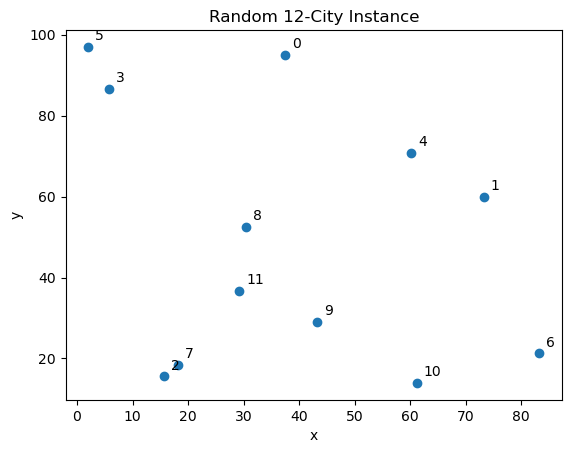

In [3]:
# Parameters
n_cities = 12              # Try 8..12 for smooth demo; ≤10 if you want to brute-force later
spread = 100.0             # Scale of the coordinate grid
brute_force_limit = 12     # limit for brute force algorithm

# Generate random 2D points
points = np.random.rand(n_cities, 2) * spread
plot_points(points, title=f"Random {n_cities}-City Instance")



## Greedy (Nearest-Neighbour) Heuristic
1. Start from a chosen city (index 0 by default).
2. Repeatedly go to the **nearest unvisited** city.
3. Return to the start to complete the tour.

This is fast, but **not guaranteed** to be optimal.


In [ ]:
def nearest_neighbour(points: np.ndarray, start: int = 0) -> List[int]:
    ...


greedy_tour = nearest_neighbour(points, start=0)
plot_tour(points, greedy_tour, title="Greedy Nearest-Neighbour Tour")
print(f"Greedy tour length: {total_length(points, greedy_tour):.2f}") 


## 2‑opt Local Improvement
2‑opt tries to shorten a tour by replacing two edges with two different edges that reconnect the tour without crossings.  
We iterate until no improving 2‑opt move exists (first-improvement).


In [ ]:
def two_opt(points: np.ndarray, tour: List[int]) -> List[int]:
    ...


improved_tour = two_opt(points, greedy_tour)
plot_tour(points, improved_tour, title="2‑opt Improved Tour")
print(f"2‑opt length: {total_length(points, improved_tour):.2f}")


## (Optional) Brute Force for Small _n_
Computes the **optimal tour** by enumerating all permutations starting from city 0.  
Only use when `n_cities ≤ 10`.


In [ ]:
import time

def brute_force_opt(points: np.ndarray, start: int = 0) -> Tuple[List[int], float]:
    ...


if n_cities <= brute_force_limit:
    start = time.perf_counter()
    
    opt_tour, opt_len = brute_force_opt(points, start=0)
    
    end = time.perf_counter()
    print(f"Execution time: {end - start:.6f} seconds")
    
    plot_tour(points, opt_tour, title="Optimal Tour (Brute Force)")
    print(f"Optimal length: {opt_len:.2f}")
else:
    print(f"n_cities > {brute_force_limit} — skipping brute force (would be too slow). Adjust `n_cities` if needed.")



## Compare Heuristics vs Optimal (if computed)


In [ ]:
def percent_gap(approx: float, best: float) -> float:
    return 100.0 * (approx - best) / best


greedy_len = total_length(points, greedy_tour)
two_opt_len = total_length(points, improved_tour)

print(f"Greedy length:  {greedy_len:.2f}")
print(f"2‑opt length:   {two_opt_len:.2f}")

try:
    print(f"Optimal length: {opt_len:.2f}")
    print(f"Greedy vs Opt gap:  {percent_gap(greedy_len, opt_len):.2f}%")
    print(f"2‑opt vs Opt gap:   {percent_gap(two_opt_len, opt_len):.2f}%")
except NameError:
    print("Optimal not computed (likely because n_cities > 10).")



## Exercises
1. **Multiple Starts:** Run the greedy heuristic from each possible start city and pick the best. How much does this help?  
2. **Parameter Sweep:** Randomly generate 20 instances with `n_cities=10`. Track the greedy and 2‑opt gaps to the optimum.  
3. **Time vs Quality:** Increase `n_cities` from 10 to 30 and compare runtimes and tour lengths for greedy vs 2‑opt.  
4. **Industry Link:** Discuss where TSP-style problems appear in logistics at your organisation (e.g., technician routing, sample pick-ups).
